# **PROJECTILE MOTION**

for theeta = 5.0 degree , Range =  0.17433407216605581
for theeta = 14.333333333333334 degree , Range =  0.4805604471360447
for theeta = 23.666666666666668 degree , Range =  0.7354647145299333
for theeta = 33.0 degree , Range =  0.9141509190604928
for theeta = 42.333333333333336 degree , Range =  0.995755508199426
for theeta = 51.66666666666667 degree , Range =  0.9731494857998749
for theeta = 61.0 degree , Range =  0.8484168354310789
for theeta = 70.33333333333334 degree , Range =  0.6340554448709123
for theeta = 79.66666666666667 degree , Range =  0.35300918512492024
for theeta = 89.0 degree , Range =  0.03490481287456664


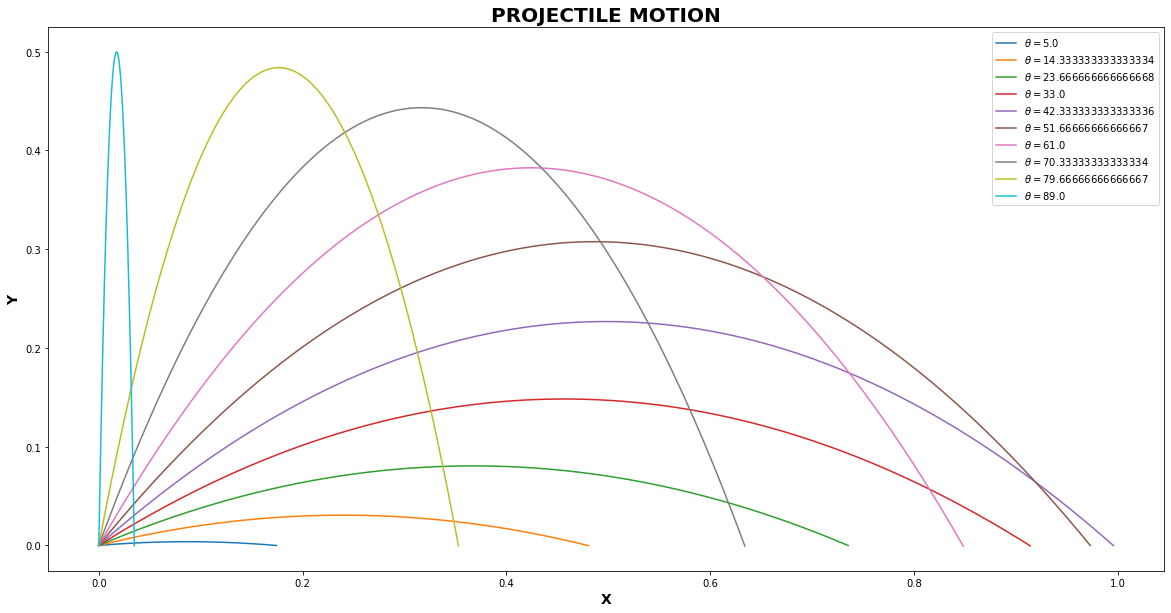

In [5]:
import matplotlib.pyplot as plt  ##importing libraries
import numpy as np
vi =5 ## It is dimensional velocity 

fig,ax1 = plt.subplots(1,1,figsize = (20,10))
ax1.set_xlabel('X',fontsize='14',fontweight='bold')
ax1.set_ylabel('Y',fontsize='14',fontweight='bold')
ax1.set_title('PROJECTILE MOTION',fontsize='20',fontweight='bold')
theta_array = np.linspace(5,89,10) # theeta array in degrees
N = int(len(theta_array))
for i in range(N):
    
    theeta = theta_array[i]  ##indexing *a* theta 
    v_x = np.cos(theeta*np.pi/180)  ##initial velocities in x and y direction
    v_y = np.sin(theeta*np.pi/180)
    x = 0 ##initial position
    y = 0
    a_y = -1 ##acceleartion in y direction

    t = 0 ##initial time  
    dt = 0.001 ##time increment
    
    ##arrays for collecting data
    X = [x]  ##X coordinate list
    Y = [y] ##Y coordinate list
 
    while(y >=0):  ##setting up the condition for infinite loop think about it
        x += v_x*dt   ##cuz v_x remains unchanged throught the motion
        y += v_y*dt/2  ##updating y co8 using verlet
        v_y += a_y*dt  
        y += v_y*dt/2

        t+=dt
       
        ##storing these new data in an array
        X.append(x)
        Y.append(y)
    
    
    ax1.plot(X,Y,label = r'$\theta = $' +str(theeta))
    plt.legend()
    
    
    ##note that this range is dimensionless. 
    ##you have to multiply it by the natural length scale to get dimensional one
    print('for theeta = '+str(theeta)+' degree , Range = ',x )   
    
plt.show()

### **How to calculate Maximum height and time of flight**


#### Maximum height can be easily calculated using $while$ loop i.e. we only have to run the loop until $V_y$ becomes negative. when the loop stops the y co-ordinate will be maximum and it will be our max height and twice of the time co-ordinate will be time of flight

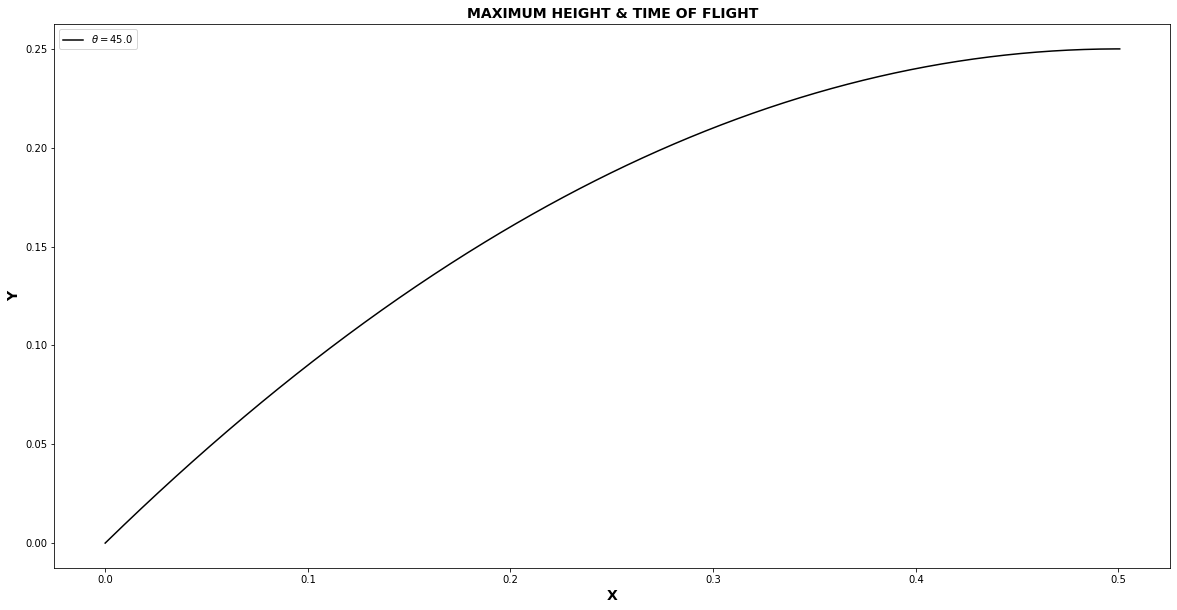

Max Height(dimensionless)  =  0.2499996010800754
Time of Flight(dimensionless)  =  1.416000000000001
Max Height(dimensionl)  =  0.6377540843879473
Time of Flight(dimensionl)  =  0.7224489795918372


In [8]:
import matplotlib.pyplot as plt  ##importing important libraries
import numpy as np

vi = 5  ##velocity scale naturral
g = 9.8 ##acceleration due to gravity
fig,ax1 = plt.subplots(1,1,figsize = (20,10))  #3creating figures
ax1.set_xlabel('X',fontsize='14',fontweight='bold')
ax1.set_ylabel('Y',fontsize='14',fontweight='bold')
ax1.set_title('MAXIMUM HEIGHT & TIME OF FLIGHT',fontsize='14',fontweight='bold')

theeta = 45.00 ##setting up theta in degree
v_x = np.cos(theeta*np.pi/180.) ##velocity coordinates
v_y = np.sin(theeta*np.pi/180.)
x = 0  ##position coordinates
y = 0
a_y = -1  ##acceleration is only along y direction

t = 0  ##initial time
dt = 0.001  ##time step size


##our historian that keep the track of ecah particle
X = [x]
Y = [y]
T = [t]
while(v_y >=0):
    ###updating x using simple Euler's Method
    ##updating y using verlet one
    
    x += v_x*dt 
    y += v_y*dt/2

    v_y += a_y*dt

    y += v_y*dt/2

    t+=dt
    
    
    ###appending the lists to store he dat
    X.append(x)
    Y.append(y)
    T.append(t)
ax1.plot(X,Y,'k',label = r'$\theta = $' +str(theeta))
plt.legend()

plt.show()

print("Max Height(dimensionless)  = ",y)
print("Time of Flight(dimensionless)  = ",2*t)

print("Max Height(dimensionl)  = ",(y*vi*vi)/g)
print("Time of Flight(dimensionl)  = ",(2*t*vi)/g)


---
### **TASK**
we know the formula for the range in the projectile motion i.e.
\begin{equation*}
R = \frac{v_i^2 sin2\theta}{g}
\end{equation*}
obtain the dimensionless range formula from above equation and plot this Range(dimensionless) vs $\theta$ and verify it computationally


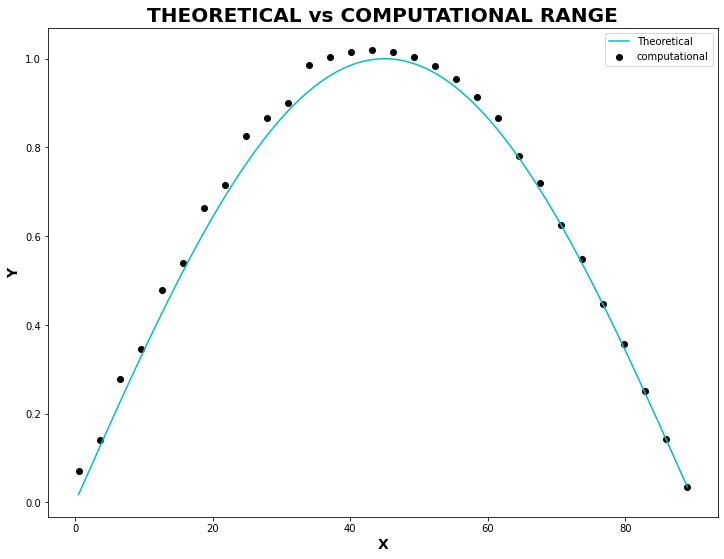

In [11]:
import matplotlib.pyplot as plt
import numpy as np

vi = 5

v_x = vi*np.cos(theeta*np.pi/180.)
v_y = vi*np.sin(theeta*np.pi/180.)

fig,ax1 = plt.subplots(1,1,figsize = (12,9))
ax1.set_xlabel('X',fontsize='14',fontweight='bold')
ax1.set_ylabel('Y',fontsize='14',fontweight='bold')
ax1.set_title('THEORETICAL vs COMPUTATIONAL RANGE',fontsize='20',fontweight='bold')
theta_array = np.linspace(0.5,89,30) # theeta array in degrees
N = int(len(theta_array))
X = []
for i in range(N):
    
    theeta = theta_array[i]
    v_x = np.cos(theeta*np.pi/180)
    v_y = np.sin(theeta*np.pi/180)
    x = 0
    y = 0
    a_y = -1

    t = 0
    dt = 0.07
    
 
    while(y >=0):
        x += v_x*dt
        y += v_y*dt/2

        v_y += a_y*dt

        y += v_y*dt/2

        t+=dt

    X.append(x)

ax1.scatter(theta_array,X,color = 'k',label ="computational",)

##plotting theoretical formula
theta2_array = np.linspace(0.5,89,1000)
Range_thr = np.sin(2*theta2_array*np.pi/180)

ax1.plot(theta2_array,Range_thr,'c',label = "Theoretical")
plt.legend()
   
plt.show()
